In [11]:
import os
import kagglehub
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

load_dotenv("./config/.env")

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download latest version
path = kagglehub.dataset_download("maajdl/yeh-concret-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bruno\.cache\kagglehub\datasets\maajdl\yeh-concret-data\versions\1


In [12]:
df = pd.read_csv(f"{path}/{os.environ["FILE_NAME"]}")
display(df)
display(df.info())
display(df.describe())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Exercício 1

In [13]:
Y = df[["csMPa"]]

## Univariate model, with a single feature: Compressive Strength Cement

In [14]:
X_univariate = sm.add_constant(df[['cement']])
model_uni = sm.OLS(Y, X_univariate).fit()

print(model_uni.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     338.7
Date:                dom, 27 abr 2025   Prob (F-statistic):           1.32e-65
Time:                        20:00:17   Log-Likelihood:                -4214.6
No. Observations:                1030   AIC:                             8433.
Df Residuals:                    1028   BIC:                             8443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4425      1.297     10.365      0.0

## Model with a few covariates: e.g., Compressive Strength Cement + Water + Age

In [15]:
X_few = sm.add_constant(df[['cement', 'water', 'age']])
model_few = sm.OLS(Y, X_few).fit()

print(model_few.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     281.9
Date:                dom, 27 abr 2025   Prob (F-statistic):          1.93e-133
Time:                        20:00:17   Log-Likelihood:                -4051.6
No. Observations:                1030   AIC:                             8111.
Df Residuals:                    1026   BIC:                             8131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.0964      3.647     17.303      0.0

## Full model: Compressive Strength all variables

In [16]:
X_full = sm.add_constant(df.drop(columns=['csMPa']))
model_full = sm.OLS(Y, X_full).fit()

print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                dom, 27 abr 2025   Prob (F-statistic):          6.29e-206
Time:                        20:00:17   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586  

# Exercício 2

## Univariate model, with a single feature: Compressive Strength Cement

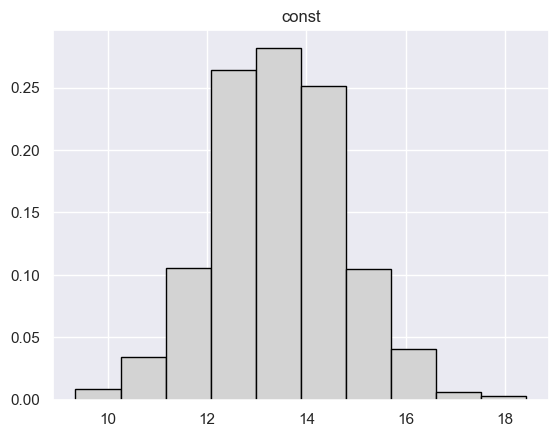

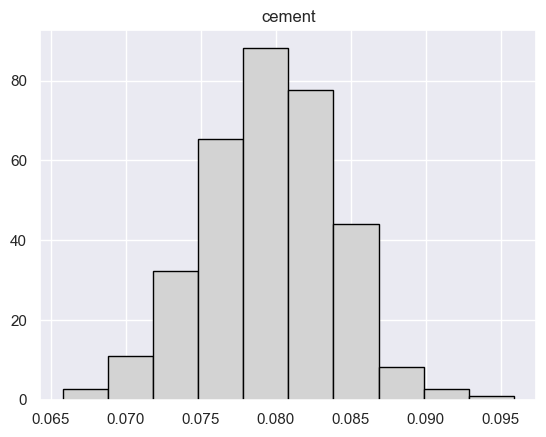

In [17]:
num_sim = 1000
beta_sims = np.zeros((len(model_uni.params.index), num_sim))

for idx, coef in enumerate(model_uni.params.index):
    simj = np.random.normal(model_uni.params[coef], (model_uni.conf_int().loc[f"{coef}"][1] - model_uni.params[f"{coef}"]) / 1.96, size=num_sim)
    beta_sims[idx, :] = simj

for idx, coef in enumerate(model_uni.params.index):
    plt.figure()
    plt.hist(beta_sims[idx, :], density=True, color='lightgray', edgecolor='black')
    plt.title(f"{coef}")

    plt.show()

## Model with a few covariates: e.g., Compressive Strength Cement + Water + Age

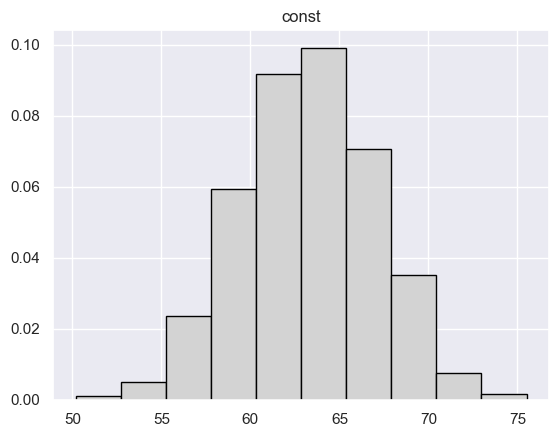

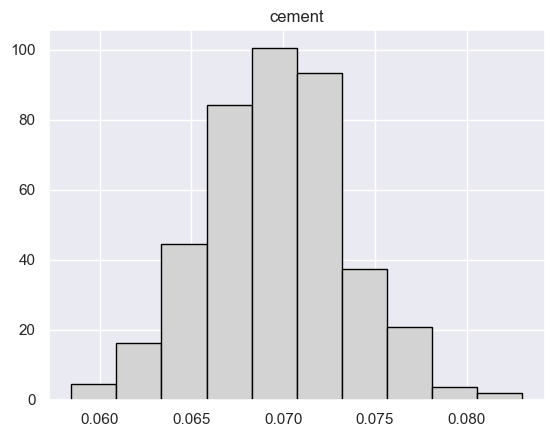

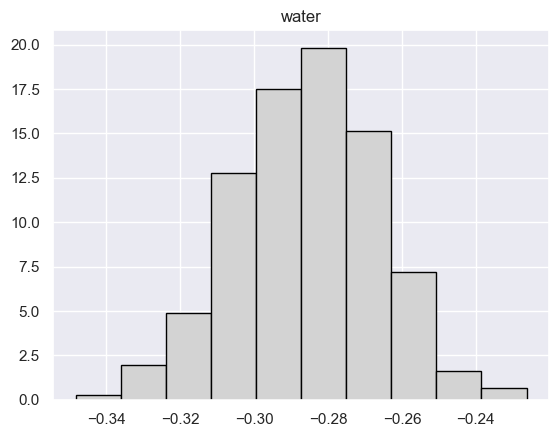

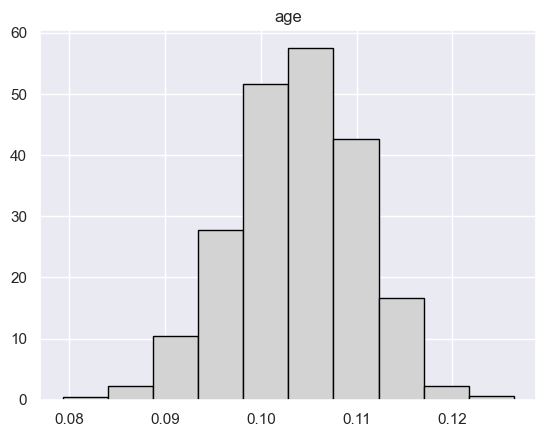

In [18]:
num_sim = 1000
beta_sims = np.zeros((len(model_few.params.index), num_sim))

for idx, coef in enumerate(model_few.params.index):
    simj = np.random.normal(model_few.params[coef], (model_few.conf_int().loc[f"{coef}"][1] - model_few.params[f"{coef}"]) / 1.96, size=num_sim)
    beta_sims[idx, :] = simj

for idx, coef in enumerate(model_few.params.index):
    plt.figure()
    plt.hist(beta_sims[idx, :], density=True, color='lightgray', edgecolor='black')
    plt.title(f"{coef}")

    plt.show()

## Full model: Compressive Strength all variables

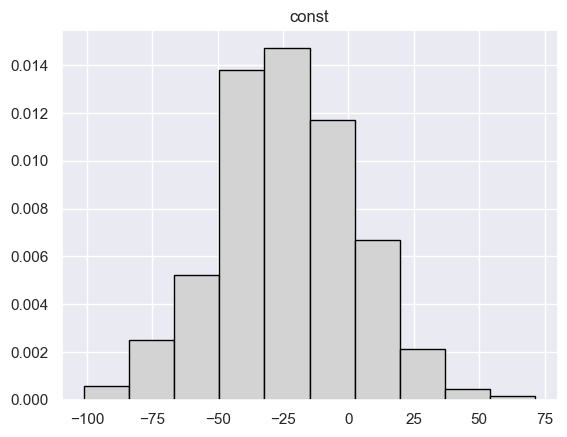

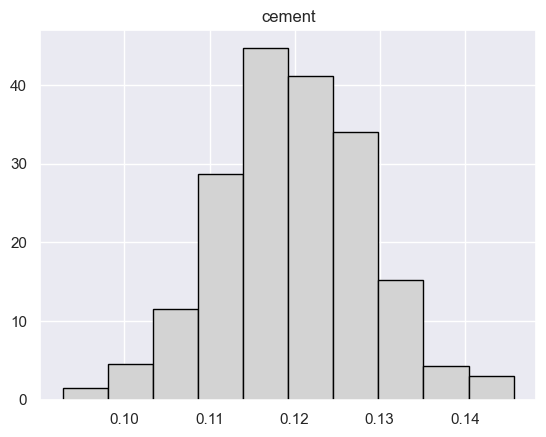

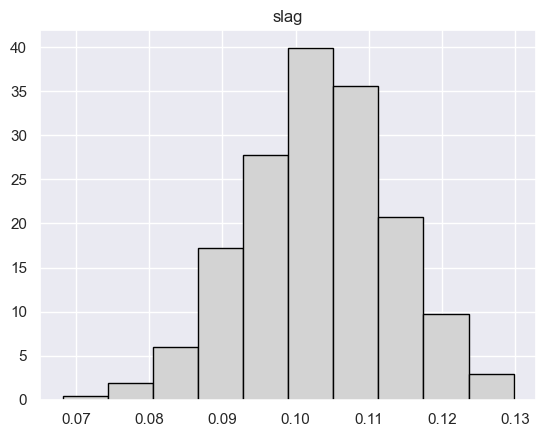

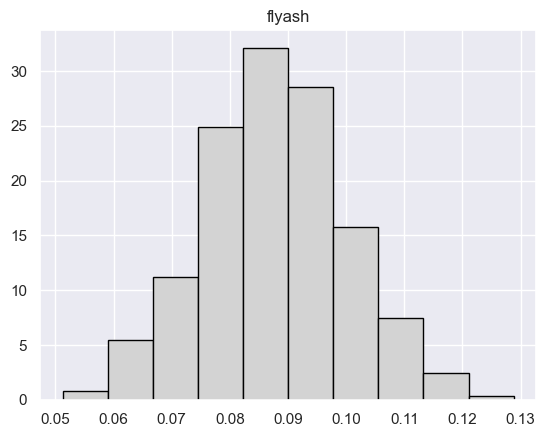

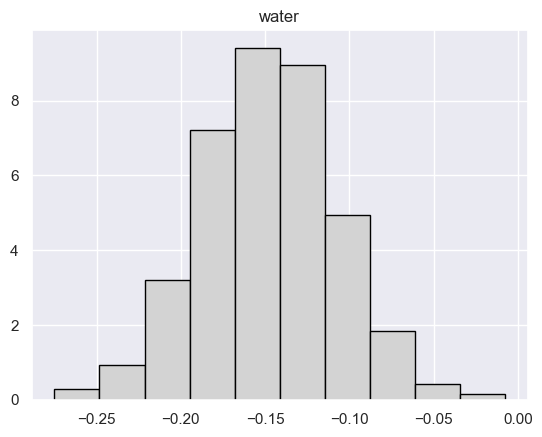

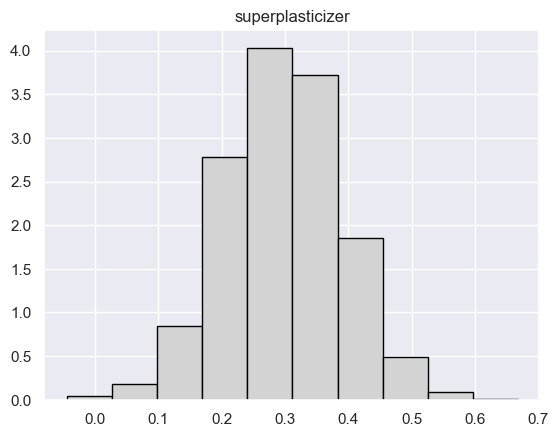

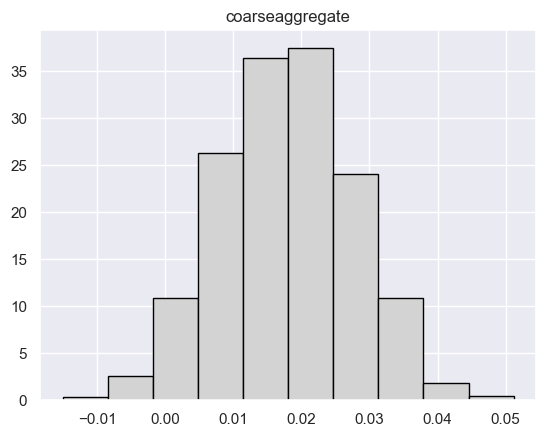

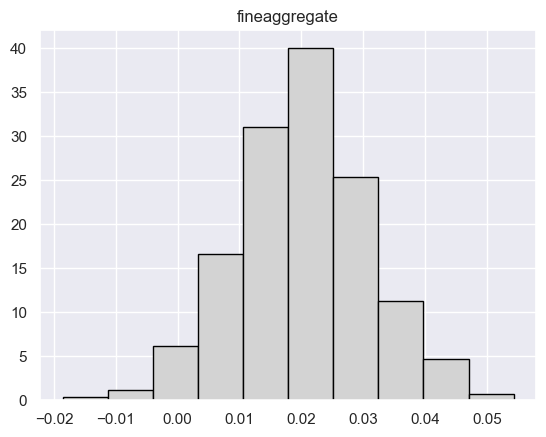

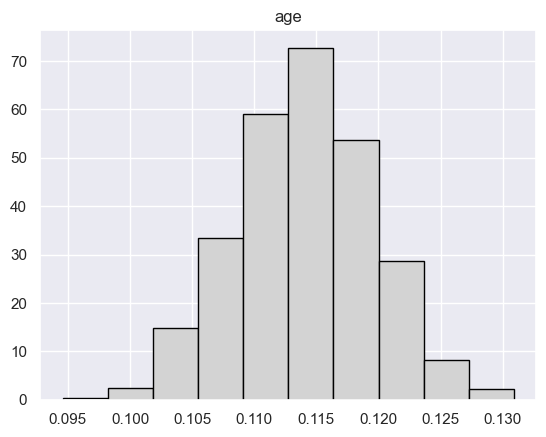

In [19]:
num_sim = 1000
beta_sims = np.zeros((len(model_full.params.index), num_sim))

for idx, coef in enumerate(model_full.params.index):
    simj = np.random.normal(model_full.params[coef], (model_full.conf_int().loc[f"{coef}"][1] - model_full.params[f"{coef}"]) / 1.96, size=num_sim)
    beta_sims[idx, :] = simj

for idx, coef in enumerate(model_full.params.index):
    plt.figure()
    plt.hist(beta_sims[idx, :], density=True, color='lightgray', edgecolor='black')
    plt.title(f"{coef}")

    plt.show()

## Comparando coeficientes de `cement` nos três cenários

In [20]:
display(df)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


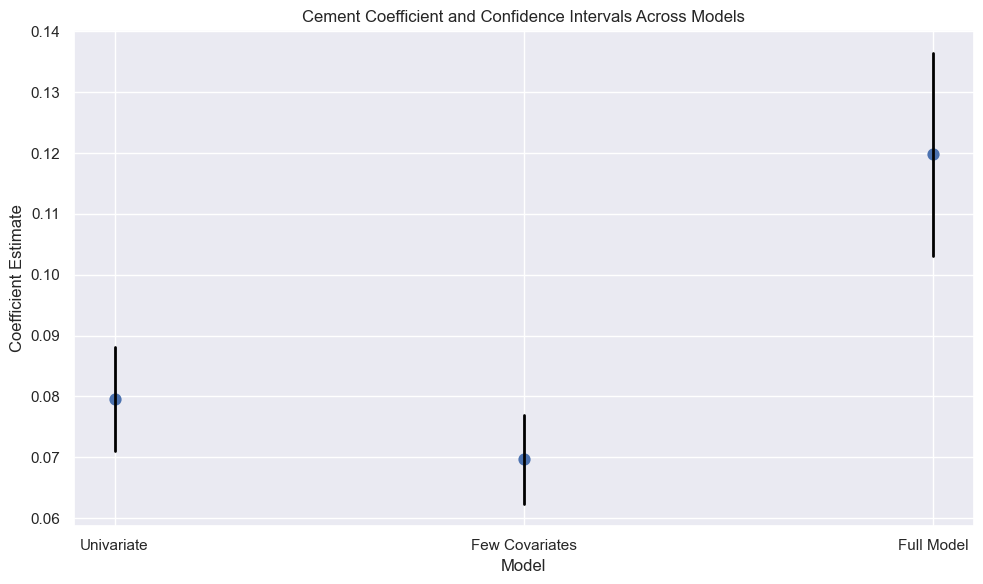

In [21]:
def extract_coefs_and_ci(model, name):
    coef = model.params['cement']
    conf_int = model.conf_int().loc['cement']
    return {
        'Model': name,
        'Coef': coef,
        'Lower CI': conf_int[0],
        'Upper CI': conf_int[1]
    }

results = pd.DataFrame([
    extract_coefs_and_ci(model_uni, 'Univariate'),
    extract_coefs_and_ci(model_few, 'Few Covariates'),
    extract_coefs_and_ci(model_full, 'Full Model')
])

plt.figure(figsize=(10, 6))
sns.pointplot(data=results, x='Model', y='Coef', join=False, capsize=0.2)

for idx, row in results.iterrows():
    plt.plot([idx, idx], [row['Lower CI'], row['Upper CI']], color='black', lw=2)

plt.title('Cement Coefficient and Confidence Intervals Across Models')
plt.ylabel('Coefficient Estimate')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()

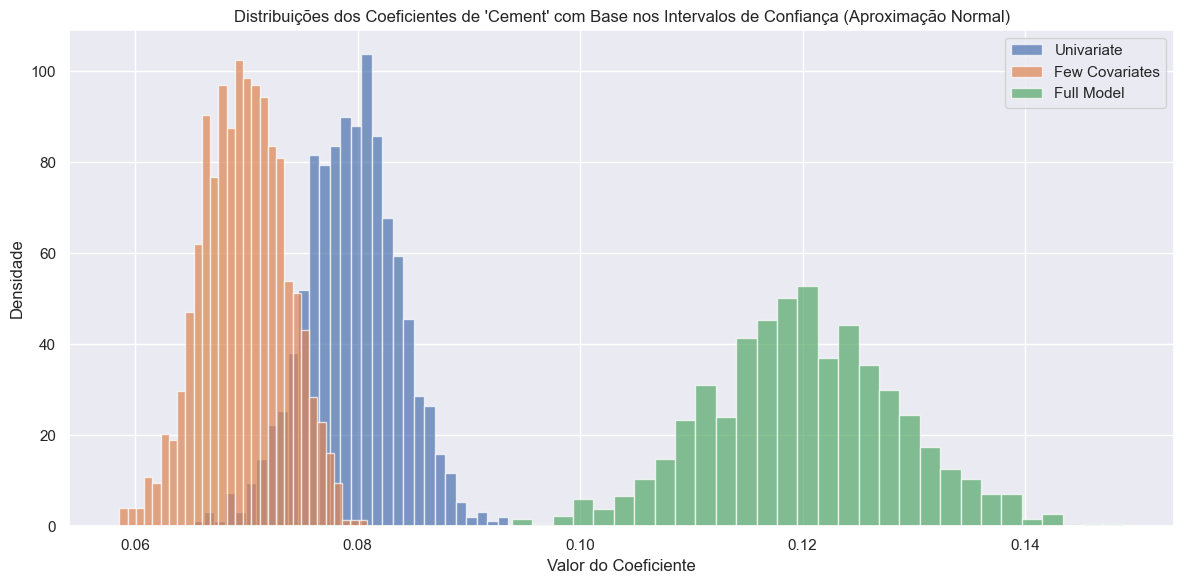

In [22]:
num_sim = 1000
samples = {
    'Univariate': np.random.normal(loc=model_uni.params['cement'],
                                   scale=(model_uni.conf_int().loc['cement'][1] - model_uni.params['cement']) / 1.96,
                                   size=num_sim),
    'Few Covariates': np.random.normal(loc=model_few.params['cement'],
                                       scale=(model_few.conf_int().loc['cement'][1] - model_few.params['cement']) / 1.96,
                                       size=num_sim),
    'Full Model': np.random.normal(loc=model_full.params['cement'],
                                   scale=(model_full.conf_int().loc['cement'][1] - model_full.params['cement']) / 1.96,
                                   size=num_sim)
}

plt.figure(figsize=(12, 6))
for i, (label, data) in enumerate(samples.items()):
    plt.hist(data, bins=30, alpha=0.7, label=label, density=True)

plt.title("Distribuições dos Coeficientes de 'Cement' com Base nos Intervalos de Confiança (Aproximação Normal)")
plt.xlabel("Valor do Coeficiente")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Com os gráficos acima, é possível observar que o intervalo de confiança muda expressivamente ao adicionar mais features ao modelo. Comparando os modelos `univariate` e `few_covariates`, fica bem claro que o valor do coeficiente de `cement` muda, mas a largura do intervalo de confiança é quase que a mesma, apesar de abrangerem valores diferentes, o tamanho deles é bem similar. Já o modelo `full_model` tem para o coeficiente de `cement` valores maiores, e um intervalo de confiança bem mais largo também. O fato dessa mudança acentuada se dá pelo efeito da multicolinearidade, onde um modelo com mais variáveis a serem consideradas, coloca um peso maior no valor de `cement` para decidir o `y_hat` e controlar os efeitos das demais variáveis. Esses fatores explicam a mudança brusca no coeficiente e o fato de intervalo de confiança ter se tornado mais largo.

# Exercício 3

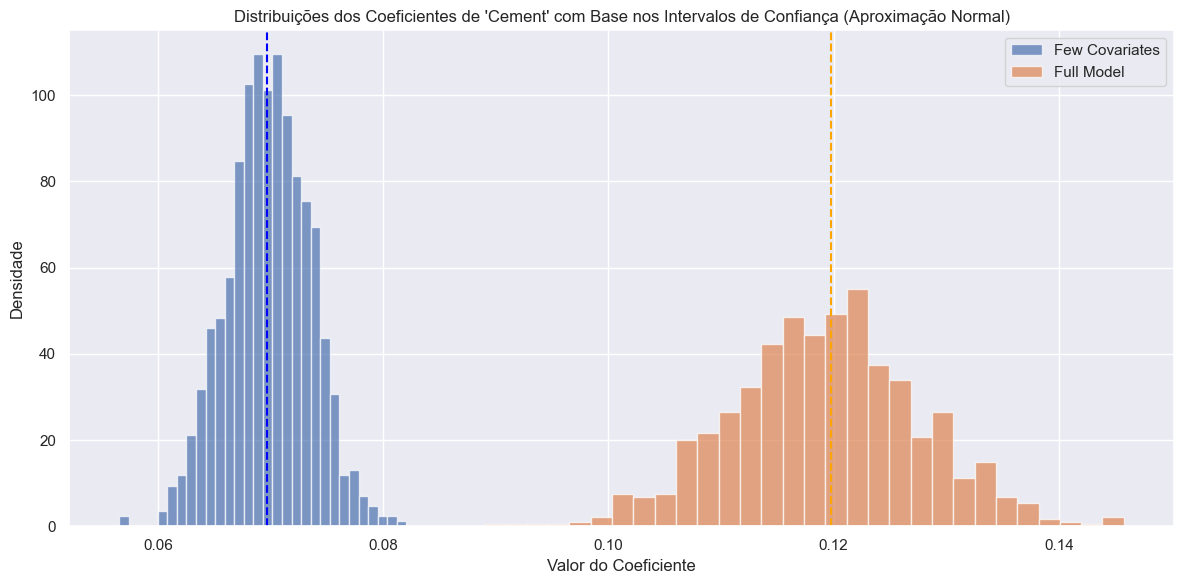

In [23]:
num_sim = 1000
samples = {
    'Few Covariates': np.random.normal(loc=model_few.params['cement'],
                                       scale=(model_few.conf_int().loc['cement'][1] - model_few.params['cement']) / 1.96,
                                       size=num_sim),
    'Full Model': np.random.normal(loc=model_full.params['cement'],
                                   scale=(model_full.conf_int().loc['cement'][1] - model_full.params['cement']) / 1.96,
                                   size=num_sim)
}

plt.figure(figsize=(12, 6))
for i, (label, data) in enumerate(samples.items()):
    plt.hist(data, bins=30, alpha=0.7, label=label, density=True)

plt.axvline(model_few.params['cement'], color='blue', linestyle='--')
plt.axvline(model_full.params['cement'], color='orange', linestyle='--')
plt.title("Distribuições dos Coeficientes de 'Cement' com Base nos Intervalos de Confiança (Aproximação Normal)")
plt.xlabel("Valor do Coeficiente")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
delta_cement = model_full.params['cement'] - model_few.params['cement']
print(f"Diferença entre os valroes dos coeficientes de 'cement' do modelo com 2 features (model_few: {model_few.params['cement']}) e com todas features ({model_full.params['cement']}): {delta_cement}\n")

y_response_model_few = model_few.predict(X_few)
y_response_model_full = model_full.predict(X_full)

print(f"Desvio-padrão do vetor de resposta do model_few: {np.std(y_response_model_few)}")
print(f"Range do vetor de resposta do model_few:\nMin: {np.min(y_response_model_few)}\nMax: {np.max(y_response_model_few)}\n")
print(f"Desvio-padrão do vetor de resposta do model_full: {np.std(y_response_model_full)}")
print(f"Range do vetor de resposta do model_full:\nMin: {np.min(y_response_model_full)}\nMax: {np.max(y_response_model_full)}")

Diferença entre os valroes dos coeficientes de 'cement' do modelo com 2 features (model_few: 0.06967805377886765) e com todas features (0.11980433449716206): 0.050126280718294405

Desvio-padrão do vetor de resposta do model_few: 11.22431382430501
Range do vetor de resposta do model_few:
Min: 8.37890016072918
Max: 79.66763854217488

Desvio-padrão do vetor de resposta do model_full: 13.100138365879374
Range do vetor de resposta do model_full:
Min: 10.455765926121934
Max: 78.99087585940849


# Exercício 4

In [35]:
size = 100

noise = np.random.normal(0, 0.05, size=size)
x1 = np.random.uniform(0, 1, size=size)
x2 = 3 + 2*x1 + noise

epsilon = np.random.normal(0, 1, size=size)
y = 10 + 3*x1 + 3*x2 + epsilon

sim_df = pd.DataFrame({"x1": x1, "x2": x2})
sim_const = sm.add_constant(sim_df)

model = sm.OLS(y, sim_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     294.7
Date:                dom, 27 abr 2025   Prob (F-statistic):           6.13e-42
Time:                        22:34:17   Log-Likelihood:                -148.64
No. Observations:                 100   AIC:                             303.3
Df Residuals:                      97   BIC:                             311.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4176      6.088      1.383      0.1

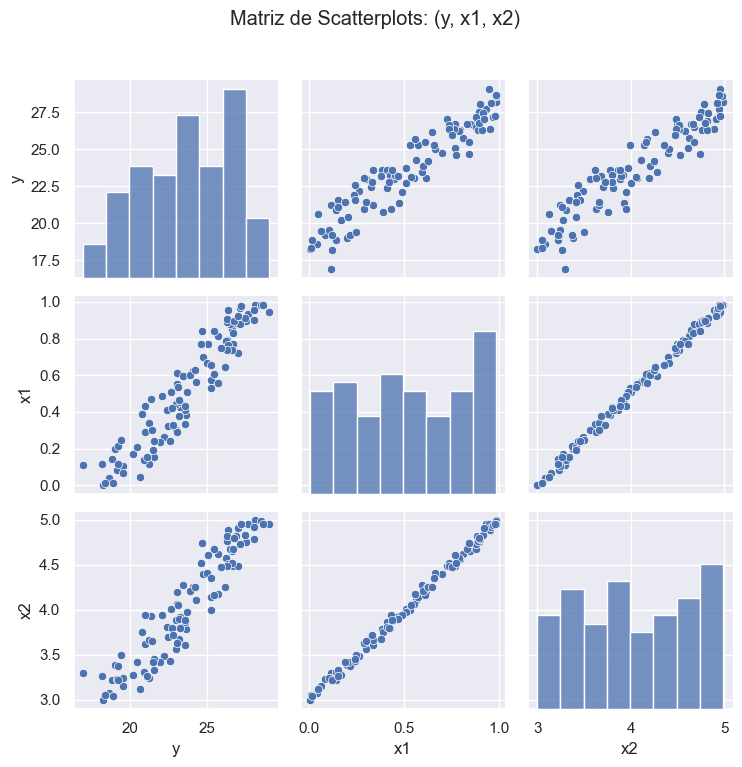

In [30]:
sim_df["y"] = y

sns.pairplot(sim_df[['y', 'x1', 'x2']])
plt.suptitle("Matriz de Scatterplots: (y, x1, x2)", y=1.02)
plt.tight_layout()
plt.show()

In [31]:
cor_x1_y = sim_df['x1'].corr(sim_df['y'])
cor_x2_y = sim_df['x2'].corr(sim_df['y'])

print(f"Correlação entre x1 e y: {cor_x1_y}")
print(f"Correlação entre x2 e y: {cor_x2_y}")

Correlação entre x1 e y: 0.9421312061360289
Correlação entre x2 e y: 0.9385850065177109


Assim como esperado, ambos os coeficientes de regressão das features `x1` e `x2` são positivos

In [25]:
size = 100
num_sim = 300
beta_sims = np.zeros((3, num_sim))

noise = np.random.normal(0, 0.05, size=size)
x1 = np.random.uniform(0, 1, size=size)
x2 = 3 + 2*x1 + noise
sim_df = pd.DataFrame({"x1": x1, "x2": x2})
sim_const = sm.add_constant(sim_df)

for idx in range(num_sim):
    epsilon = np.random.normal(0, 1, size=size)
    y = 10 + 3*x1 + 3*x2 + epsilon
    simj = sm.OLS(y, sim_const).fit()
    beta_sims[:, idx] = simj.params

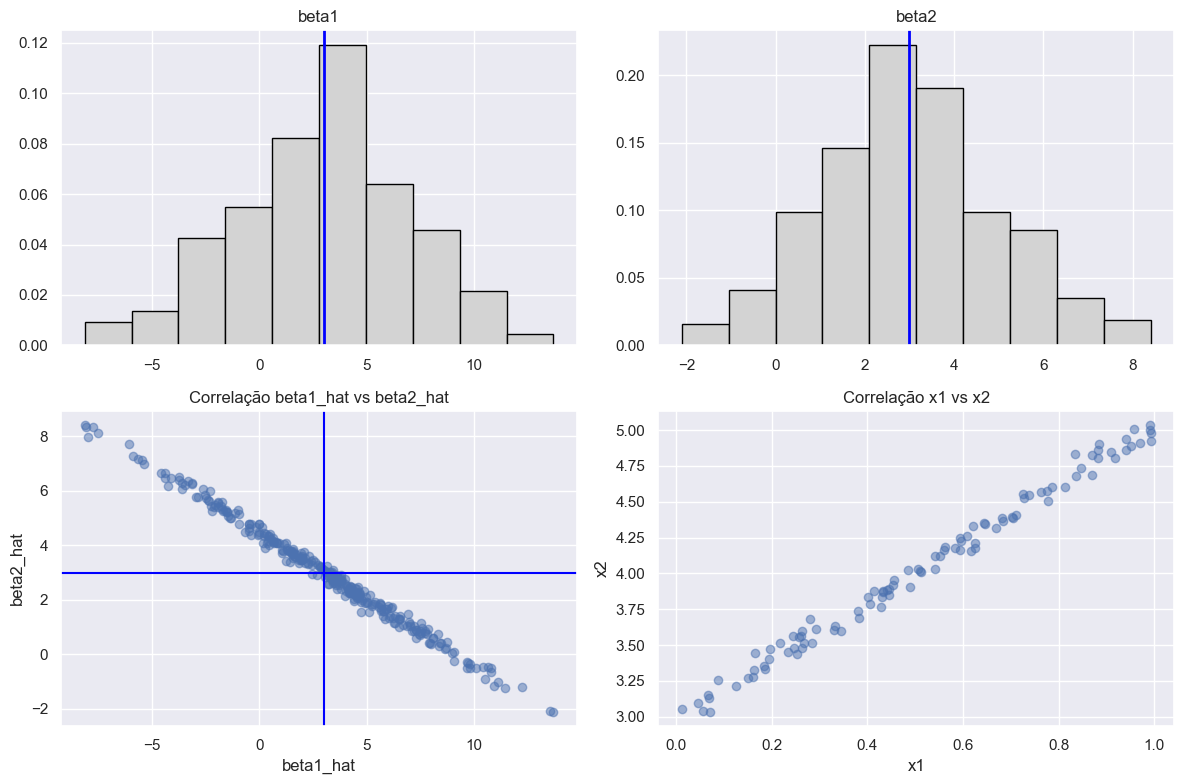

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(beta_sims[1, :], density=True, color='lightgray', edgecolor='black')
axs[0, 0].axvline(x=3, color='blue', linewidth=2)
axs[0, 0].set_title("beta1")

axs[0, 1].hist(beta_sims[2, :], density=True, color='lightgray', edgecolor='black')
axs[0, 1].axvline(x=3, color='blue', linewidth=2)
axs[0, 1].set_title("beta2")

axs[1, 0].scatter(beta_sims[1, :], beta_sims[2, :], alpha=0.5)
axs[1, 0].axvline(x=3, color='blue')
axs[1, 0].axhline(y=3, color='blue')
axs[1, 0].set_xlabel("beta1_hat")
axs[1, 0].set_ylabel("beta2_hat")
axs[1, 0].set_title("Correlação beta1_hat vs beta2_hat")

axs[1, 1].scatter(x1, x2, alpha=0.5)
axs[1, 1].set_xlabel("x1")
axs[1, 1].set_ylabel("x2")
axs[1, 1].set_title("Correlação x1 vs x2")

plt.tight_layout()
plt.show()

Observando os resultados obtidos com o que é mostrado pela saída do `OLS`, fica evidente que o valor estimado para os coeficientes `beta1_hat` e `beta2_hat` se encaixa na média dos histogramas, além de serem relativamente próximos aos valores reais esperados (no caso `beta1* = beta2* = 3.0`). Além disso, o intervalo de confiança mostrado na saída condiz bem com o que os histogramas permitem evidenciar pelas simulações, mostrando que, de fato, os coeficientes estimados se encaixam no range estimado pelo `OLS`. Esses intervalos de confiança são bem largos e chegam até serem negativos, e os histogramas permitem confirmar essa afirmação.

Outro aspecto digno de nota é a correlação entre as features e seus coeficientes, enquanto as features apresentam uma correlação linear positiva, suas features apresentam uma correlação bem negativa. Enquanto uma tende a coeficientes maiores do que o valor esperado, a outra tende a valores menores que o esperado.

# Exercício 5

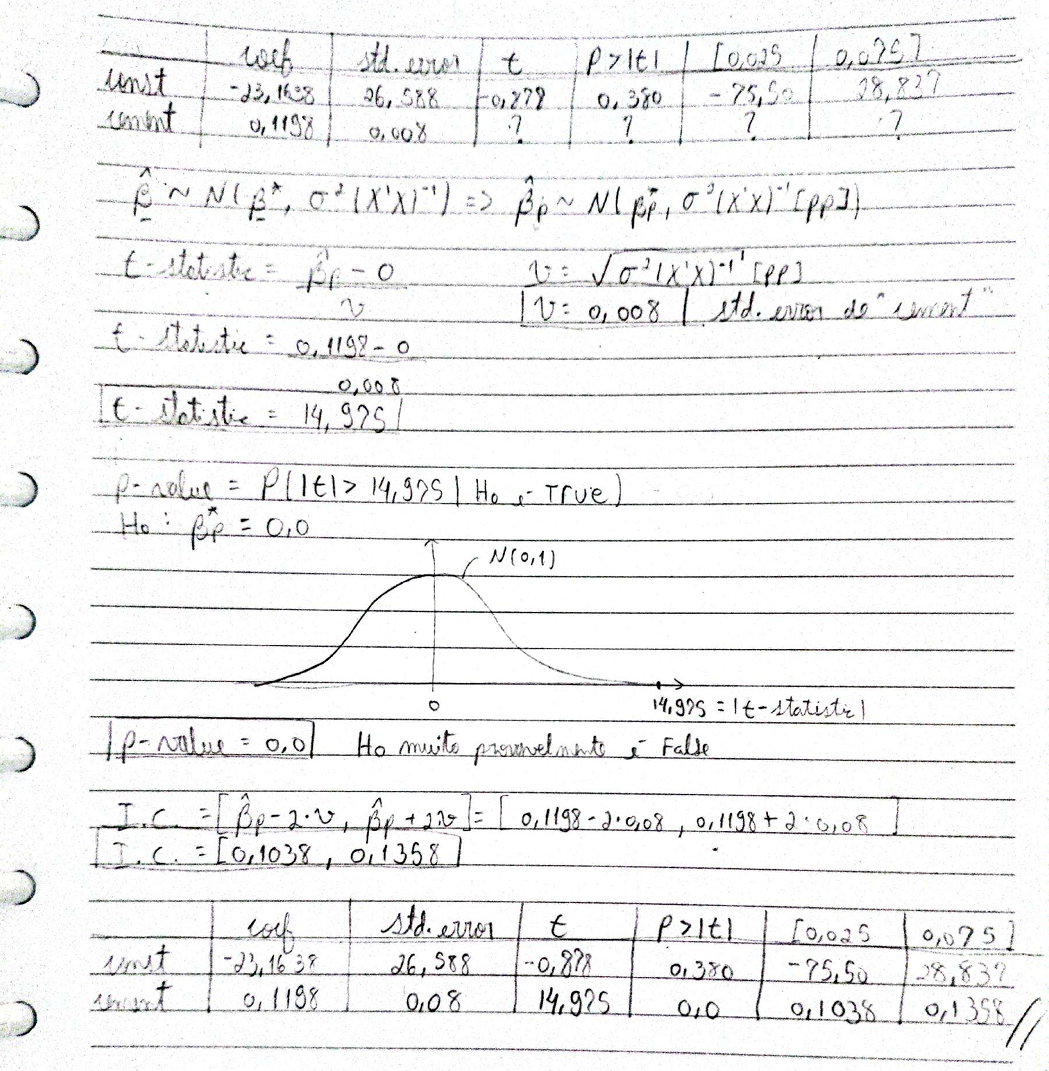